In [1]:
from scipy import signal
# Ανατρέξτε στην τεκμηρίωση της βιβλιοθήκης scipy.signal
# https://docs.scipy.org/doc/scipy/reference/signal.html
from scipy.fft import fft, fftfreq
from scipy.fftpack import fftshift, ifftshift
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import IntRangeSlider, widgets, Layout, HBox, VBox
from IPython.display import display, clear_output
print("Libraries added successfully!")

Libraries added successfully!


In [2]:
s=2
print('s =',s)

s = 2


In [3]:
v=np.array([1,5,9])
print('v =',v)

v = [1 5 9]


In [4]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
print('a =',a)

a = [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
a+5

array([[ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [6]:
b=s*v*2
print('b=',b)

b= [ 4 20 36]


In [7]:
np.multiply(v,b)

array([  4, 100, 324])

In [8]:
len(v)

3

In [9]:
a.shape   # για array: np.array(a.shape)

(3, 3)

In [10]:
a[0,1] # Η δεικτοδότηση αρχίζει από το 0

2

In [11]:
a[1,-1] # Αρνητικές τιμές μετρούν από το τέλος, π.χ. το -1 αναφέρεται στο τελευταίο στοιχείο

6

In [12]:
v1 = v[1:3]
v2 = v[1:2]
print('v1 =',v1)
print('v2 =',v2)
# ΠΡΟΣΟΧΗ: τα στοιχεία [2ο,3ο] δίνονται ως 1:3 και όχι ως 1:2

v1 = [5 9]
v2 = [5]


In [13]:
a[0:2,:] # Ομοίως: οι γραμμές 1 & 2 δίνονται ως 0:2 και όχι ως 0:1

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
t=np.arange(0,0.5,0.1)
print('t=',t)

t= [0.  0.1 0.2 0.3 0.4]


In [15]:
# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1 / fs  # Sampling period
L = 1000  # Number of samples
t = np.arange(0, L) * T  # Create time vector


# Output widget for the plots
graph_output0 = widgets.Output()

def update_plot(selected_frequencies_first):
    with graph_output0:
        clear_output(wait=True)  # Clear the previous plot
        # Generate the signal with the selected frequencies
        signal = np.zeros(len(t))
        for f in range(selected_frequencies_first[0], selected_frequencies_first[1] + 1):
            signal += np.sin(2 * np.pi * f * t)

        # Calculate the FFT of the original signal
        original_signal_fft = fft(signal)
        # Calculate frequencies for the FFT of the original signal
        original_freqs = fftfreq(L, T)[:L // 2]
        # Calculate magnitude of Fourier coefficients (amplitude) for the original signal
        original_magnitude = np.abs(original_signal_fft)[:L // 2]
        
        # Plotting
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
        
        # Original signal plot
        axs[0].plot(t, signal, color='#00CC96')
        axs[0].set_title('Original Signal')
        axs[0].set_xlabel('Time (s)')
        axs[0].set_ylabel('Amplitude')
        axs[0].grid(True)
        
        # Fourier Transform plot
        axs[1].plot(original_freqs, original_magnitude)
        axs[1].set_title('Fourier Transformation of Original Signal')
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('Magnitude')
        axs[1].grid(True)
        
        plt.tight_layout()
        plt.show()

# Create the slider widget
frequency_slider = widgets.IntRangeSlider(
    value=[5, 10],
    min=1,
    max=50,
    step=1,
    description='Frequency Range (Hz)',
    style={'description_width': 'initial'},
    layout=Layout(width='90%'),
    continuous_update=False
)


def response(change):
        fig = update_plot(frequency_slider.value)

# Observe changes in the slider and update the plot accordingly
frequency_slider.observe(response, names='value')

# Style the HTML element
html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Continuous Time Fourier Transform – CTFT</h2>
    """
)

# Display the slider and the outputs
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center', width='100%')
ui = widgets.VBox([html_label,
              frequency_slider,
              graph_output0], layout=vbox_layout)

out = widgets.interactive_output(update_plot, {'selected_frequencies_first': frequency_slider})

clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

In [16]:
# Παράμετροι δειγματοληψίας
T = 1 / fs  # Sampling period
L = 1000  # Number of samples

# Create time vector
t = np.arange(0, L) * T

def plot_sampled_signal(f_range, n_samples):
    # Generate the signal with the selected frequencies
    signal = np.zeros(len(t))
    for f in range(f_range[0], f_range[1] + 1):
        signal += np.sin(2 * np.pi * f * t)
    
   # Correct downsampling approach
    sample_rate = n_samples  # Directly using selected_samples as an integer
    downsampling_factor = int(fs / sample_rate)  # Downsampling factor

    # Select every nth sample from the original time vector to match the downsampled signal
    sample_points = t[::downsampling_factor]

    # Downsample the signal by selecting every nth sample
    downsampled_signal = signal[::downsampling_factor]

    # Recalculate L for the downsampled signal if needed
    L_downsampled = len(downsampled_signal)

    # Calculate the DFT of the downsampled signal
    sampled_signal_fft = fft(downsampled_signal)

    # Calculate frequencies for the FFT of the downsampled signal
    # Note: The new sampling period is the inverse of the new sampling rate
    sampled_freqs = fftfreq(L_downsampled, 1/sample_rate)[:L_downsampled // 2]

    # Calculate magnitude of Fourier coefficients (amplitude) for the downsampled signal
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    n = len(downsampled_signal)
    T = 1 / sample_rate  # Recalculate the sampling period with the selected sample rate

    # After calculating the magnitude of Fourier coefficients
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    # Create a new frequency vector that includes the replicated frequencies
    # First, calculate the original frequency bins for the positive frequencies
    original_sampled_freqs = fftfreq(L_downsampled, T)[:L_downsampled // 2]

    shifted_freqs_negative = original_sampled_freqs - 1/T  # Shift for -1/Ts
    shifted_freqs_positive = original_sampled_freqs + 1/T  # Shift for +1/Ts

    # Concatenate the original and shifted (replicated) frequencies and magnitudes
    # This includes the original frequencies, and the replications at -1/Ts and +1/Ts
    replicated_freqs = np.concatenate([shifted_freqs_negative, original_sampled_freqs, shifted_freqs_positive])
    replicated_magnitude = np.concatenate([sampled_magnitude, sampled_magnitude, sampled_magnitude])

    # Sort the replicated frequencies and magnitudes in ascending order for proper plotting
    sorted_indices = np.argsort(replicated_freqs)
    sorted_replicated_freqs = replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]
    
    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    axs[0].scatter(sample_points, downsampled_signal, color='#00CC96', s=12)
    axs[0].set_title('Sampled Signal')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    axs[1].plot(sorted_replicated_freqs, sorted_replicated_magnitude, color='#1F77B4')
    axs[1].set_title('Fourier Transformation of Sampled Signal')
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('Magnitude')
    axs[1].grid(True)  

    plt.tight_layout()
    plt.show()

# Widgets
frequency_slider = widgets.IntRangeSlider(
    value=[5, 10],
    min=1,
    max=50,
    step=1,
    description='Frequency Range (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

samples_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=1000,
    step=25,
    description='Samples:',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Signal Reconstruction in Digital Signal Processing</h2>
    """
)

vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')
ui = widgets.VBox([html_label, frequency_slider, samples_slider], layout=vbox_layout)

out = widgets.interactive_output(plot_sampled_signal, {'f_range': frequency_slider, 'n_samples': samples_slider})

clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

In [17]:
# Παράμετροι δειγματοληψίας
T = 1 / fs  # Sampling period
L = 1000  # Number of samples

# Create time vector
t = np.arange(0, L) * T

def plot_sampled_signal(selected_frequencies, selected_samples):
    # Generate the signal with the selected frequencies
    signal = np.zeros(len(t))
    for f in range(selected_frequencies[0], selected_frequencies[1] + 1):
        signal += np.sin(2 * np.pi * f * t)
    
   # Correct downsampling approach
    sample_rate = selected_samples  # Directly using selected_samples as an integer
    downsampling_factor = int(fs / sample_rate)  # Downsampling factor

    # Downsample the signal by selecting every nth sample
    downsampled_signal = signal[::downsampling_factor]

    # Recalculate L for the downsampled signal if needed
    L_downsampled = len(downsampled_signal)

    # Calculate the DFT of the downsampled signal
    sampled_signal_fft = fft(downsampled_signal)

    # Calculate magnitude of Fourier coefficients (amplitude) for the downsampled signal
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    n = len(downsampled_signal)
    T = 1 / sample_rate  # Recalculate the sampling period with the selected sample rate

    # After calculating the magnitude of Fourier coefficients
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    # Create a new frequency vector that includes the replicated frequencies
    # First, calculate the original frequency bins for the positive frequencies
    original_sampled_freqs = fftfreq(L_downsampled, T)[:L_downsampled // 2]

    shifted_freqs_negative = original_sampled_freqs - 1/T  # Shift for -1/Ts
    shifted_freqs_positive = original_sampled_freqs + 1/T  # Shift for +1/Ts

    # Concatenate the original and shifted (replicated) frequencies and magnitudes
    # This includes the original frequencies, and the replications at -1/Ts and +1/Ts
    replicated_freqs = np.concatenate([shifted_freqs_negative, original_sampled_freqs, shifted_freqs_positive])
    replicated_magnitude = np.concatenate([sampled_magnitude, sampled_magnitude, sampled_magnitude])

    # Sort the replicated frequencies and magnitudes in ascending order for proper plotting
    sorted_indices = np.argsort(replicated_freqs)
    sorted_replicated_freqs = replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]

    # Generate an array of sample indices for the downsampled signal
    sample_indices = np.arange(len(downsampled_signal))

    # Normalize the frequency values
    normalized_freqs = original_sampled_freqs / (1/T)

    # Since you previously concatenated and sorted for replication, ensure to apply normalization there as well
    normalized_replicated_freqs = np.concatenate([
        (shifted_freqs_negative / (1/T)),  # Normalize -1/Ts shifted frequencies
        normalized_freqs,  # Already normalized original frequencies
        (shifted_freqs_positive / (1/T))   # Normalize +1/Ts shifted frequencies
    ])

    # Sort the normalized and replicated frequencies for proper plotting
    sorted_indices = np.argsort(normalized_replicated_freqs)
    sorted_normalized_replicated_freqs = normalized_replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]

    # Create the plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot the downsampled signal
    axs[0].scatter(sample_indices, downsampled_signal, color='#00CC96', s=12)
    axs[0].set_title('Sampled Signal')
    axs[0].set_xlabel('Sample Number')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)

    # Plot the Fourier Transform of the downsampled signal
    axs[1].plot(sorted_normalized_replicated_freqs, sorted_replicated_magnitude, color='#1F77B4')
    axs[1].set_title('Normalized Fourier Transformation of Sampled Signal')
    axs[1].set_xlabel('Normalized Frequency (f/fs)')
    axs[1].set_ylabel('Magnitude')
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# IPyWidgets sliders
frequency_slider = widgets.IntRangeSlider(
    value=[5, 10],
    min=1,
    max=50,
    step=1,
    description='Frequency range (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

samples_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=1000,
    step=25,
    description='Samples:',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Discrete Time Fourier Transform – DTFT</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')
ui = widgets.VBox([html_label, frequency_slider, samples_slider], layout=vbox_layout)

# Interaction between widgets and function
out = widgets.interactive_output(
    plot_sampled_signal, 
    {'selected_frequencies': frequency_slider, 'selected_samples': samples_slider}
)

clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

In [18]:
# Παράμετροι δειγματοληψίας
T = 1 / fs  # Sampling period
L = 1000  # Number of samples

# Create time vector
t = np.arange(0, L) * T

def plot_signals(f_range, samples, selected_N):
    # Generate the signal with the selected frequencies
    signal = np.zeros(len(t))
    for f in range(f_range[0], f_range[1] + 1):
        signal += np.sin(2 * np.pi * f * t)
    
   # Correct downsampling approach
    sample_rate = samples  # Directly using samples as an integer
    downsampling_factor = int(fs / sample_rate)  # Downsampling factor

    # Downsample the signal by selecting every nth sample
    downsampled_signal = signal[::downsampling_factor]

    # Recalculate L for the downsampled signal if needed
    L_downsampled = len(downsampled_signal)

    # Calculate the DFT of the downsampled signal
    sampled_signal_fft = fft(downsampled_signal)

    # Calculate magnitude of Fourier coefficients (amplitude) for the downsampled signal
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    n = len(downsampled_signal)
    T = 1 / sample_rate  # Recalculate the sampling period with the selected sample rate

    # After calculating the magnitude of Fourier coefficients
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    # Create a new frequency vector that includes the replicated frequencies
    # First, calculate the original frequency bins for the positive frequencies
    original_sampled_freqs = fftfreq(L_downsampled, T)[:L_downsampled // 2]

    shifted_freqs_negative = original_sampled_freqs - 1/T  # Shift for -1/Ts
    shifted_freqs_positive = original_sampled_freqs + 1/T  # Shift for +1/Ts

    # Concatenate the original and shifted (replicated) frequencies and magnitudes
    # This includes the original frequencies, and the replications at -1/Ts and +1/Ts
    replicated_freqs = np.concatenate([shifted_freqs_negative, original_sampled_freqs, shifted_freqs_positive])
    replicated_magnitude = np.concatenate([sampled_magnitude, sampled_magnitude, sampled_magnitude])

    # Sort the replicated frequencies and magnitudes in ascending order for proper plotting
    sorted_indices = np.argsort(replicated_freqs)
    sorted_replicated_freqs = replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]

    # Generate an array of sample indices for the downsampled signal
    sample_indices = np.arange(len(downsampled_signal))

    # Normalize the frequency values
    normalized_freqs = original_sampled_freqs / (1/T)

    # Since you previously concatenated and sorted for replication, ensure to apply normalization there as well
    normalized_replicated_freqs = np.concatenate([
        (shifted_freqs_negative / (1/T)),  # Normalize -1/Ts shifted frequencies
        normalized_freqs,  # Already normalized original frequencies
        (shifted_freqs_positive / (1/T))   # Normalize +1/Ts shifted frequencies
    ])

    # Sort the normalized and replicated frequencies for proper plotting
    sorted_indices = np.argsort(normalized_replicated_freqs)
    sorted_normalized_replicated_freqs = normalized_replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]

    # Adjust the sampling interval for selecting frequencies and magnitudes
    sampled_indices = np.arange(0, len(sorted_normalized_replicated_freqs), selected_N)
    sampled_normalized_replicated_freqs = sorted_normalized_replicated_freqs[sampled_indices]
    sampled_replicated_magnitude = sorted_replicated_magnitude[sampled_indices]
    
    # Create the plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Time-domain signal plot
    axs[0].scatter(sample_indices, downsampled_signal, color='#00CC96', s=12)
    axs[0].set_title('Sampled Signal')
    axs[0].set_xlabel('Sample Number')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)

    
    axs[1].stem(sampled_normalized_replicated_freqs, sampled_replicated_magnitude, linefmt='#1F77B4', markerfmt='o', basefmt=" ")
    axs[1].set_title('Sampled Normalized Fourier Transformation')
    axs[1].set_xlabel('Normalized Frequency (f/fs)')
    axs[1].set_ylabel('Magnitude')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Define interactive widgets
frequency_slider = widgets.IntRangeSlider(
    value=[5, 40],
    min=1,
    max=51,
    step=1,
    description='Frequency range (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}
)

samples_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=1000,
    step=25,
    description='Samples:',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}
)

N_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=25,
    step=1,
    description='N:',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Properties of the Discrete Fourier Transform in Digital Signal Processing</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')
ui = widgets.VBox([html_label, frequency_slider, samples_slider, N_slider], layout=vbox_layout)
out = widgets.interactive_output(plot_signals, {'f_range': frequency_slider, 'samples': samples_slider, 'selected_N': N_slider})

# Display the widgets and output
clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

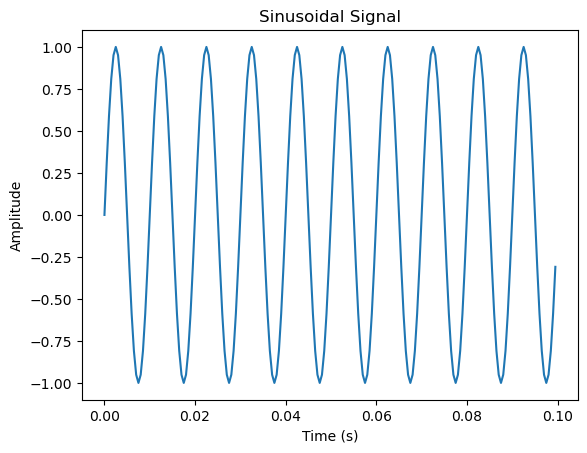

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# 2.1 Create a Sinusoidal Signal
# ==============================================================================
Fs = 2000                  # Sampling frequency in Hz
Ts = 1 / Fs                # Sampling period in seconds
T = 0.1                    # Signal duration in seconds
t = np.arange(0, T, Ts)    # Time vector for signal
A = 1                      # Signal amplitude
x = A * np.sin(2 * np.pi * 100 * t)  # Generate sinusoidal signal
L = len(x)                 # Length of the signal

# Plot the sinusoidal signal in time domain
plt.figure()
plt.plot(t, x)
plt.title('Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show(block=False)

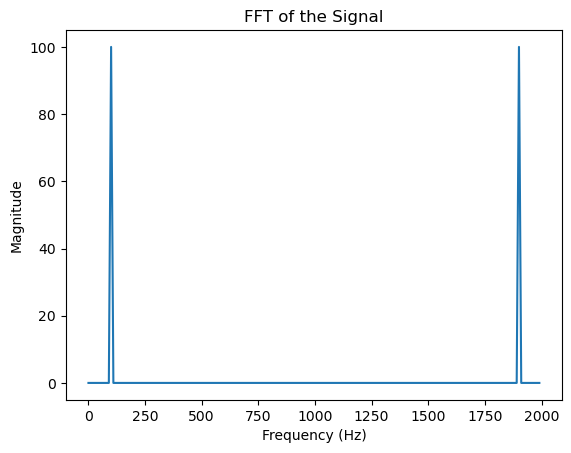

In [20]:
# ==============================================================================
# 2.2 Plot Fourier Transform (FT) of the Signal
# ==============================================================================
N = 1 * L                  # Length of Fourier Transform
Fo = Fs / N                # Frequency resolution
Fx = np.fft.fft(x, N)      # Discrete Fourier Transform (DFT) of the signal
freq = np.arange(0, N) * Fo  # Frequency vector

# Plot the magnitude of the DFT
plt.figure()
plt.plot(freq, np.abs(Fx))
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show(block=False)


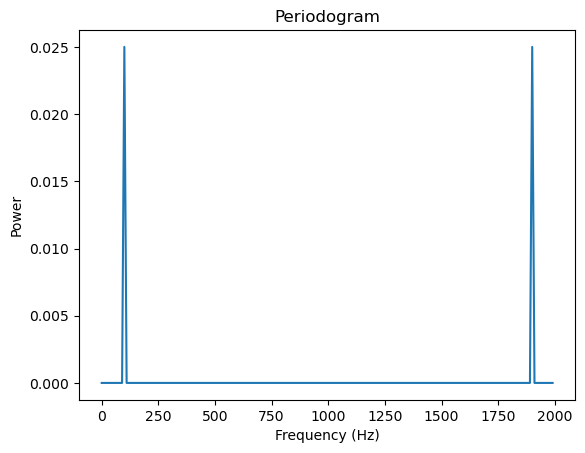

In [21]:
# ==============================================================================
# 2.3 Plot Signal Periodogram
# ==============================================================================
power = ((Fx * np.conj(Fx)) / (Fs * L)).real  # Calculate spectral density

plt.figure()
plt.plot(freq, power)
plt.title('Periodogram')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show(block=False)

In [22]:
# ==============================================================================
# 2.4 Calculate Signal Power
# ==============================================================================
power_theory = A**2 / 2                # Theoretical power based on signal amplitude
dB = 10 * np.log10(power_theory)       # Convert power to decibels (dB)
power_time_domain = np.sum(np.abs(x)**2) / L  # Calculate power in time domain
power_frequency_domain = np.sum(power * Fo).real  # Calculate power in frequency domain

# Display calculated power values
print(f'Power (Theory): {power_theory}')
print(f'Power (dB): {dB}')
print(f'Power (Time Domain): {power_time_domain}')
print(f'Power (Frequency Domain): {power_frequency_domain}')
print('hi')

Power (Theory): 0.5
Power (dB): -3.010299956639812
Power (Time Domain): 0.5000000000000001
Power (Frequency Domain): 0.5000000000000001
hi


In [23]:
# Callback function to update graphs
def update_graph(selected_frequencies_part1, selected_Fo):
    # Part 1: Create the signal
    Fs = selected_frequencies_part1        # Sampling frequency 1000 Hz
    Ts = 1 / Fs                      # Sampling period
    L = 1000                         # Length of signal (number of samples)
    T = L * Ts                       # Duration of signal
    t = np.arange(0, (L - 1) * Ts, Ts)  # Time vector

    global new_x 
    new_x = np.sin(2 * np.pi * (selected_Fo-30) * t) \
        + 0.8 * np.sin(2 * np.pi * (selected_Fo+20) * (t - 2)) \
        + np.sin(2 * np.pi * selected_Fo * t)  # 60 Hz component
    
    # Plotting
    fig, axs = plt.subplots(4, 1, figsize=(12, 20))
    
    # Time domain plot
    axs[0].plot(t, new_x, color='#00CC96')
    axs[0].set_title('Time domain plot of x')
    axs[0].set_xlabel('t (sec)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    # Fourier transform
    def nextpow2(i):
        n = 1
        while n < i:
            n *= 2
        return n

    N = nextpow2(L)                 # Length of Fourier transform
    Fo = Fs / N                     # Frequency resolution
    f = np.arange(0, N) * Fo        # Frequency vector
    X = np.fft.fft(new_x, N)            # Compute DFT for N points

    # Frequency domain plot
    axs[1].plot(f[1:N], abs(X[1:N]), color='#1F77B4')
    axs[1].set_title('Frequency domain plot of x')
    axs[1].set_xlabel('f (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid(True)

    # Shift frequencies to center
    f = f - Fs / 2
    X = np.fft.fftshift(X)

    # Two-sided spectrum of x
    f_shifted = f 

    # Two-sided spectrum plot
    axs[2].plot(f_shifted, abs(X), color='#1F77B4')
    axs[2].set_title('Two sided spectrum of x')
    axs[2].set_xlabel('f (Hz)')
    axs[2].set_ylabel('Amplitude')
    axs[2].grid(True)

    # Calculate power
    power = np.multiply(X, np.conj(X)) / N / L

    # Periodogram plot
    axs[3].plot(f_shifted, power.real, color='#1F77B4')
    axs[3].set_title('Periodogram')
    axs[3].set_xlabel('Frequency (Hz)')
    axs[3].set_ylabel('Power')
    axs[3].grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive widgets
frequency_slider = widgets.IntSlider(
    min=100,
    max=2000,
    step=100,
    value=1000,
    description='Sampling Frequency (Fs):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

Fo_slider = widgets.IntSlider(
    min=40,
    max=400,
    step=10,
    value=100,
    description='Frequency (Fo):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""

    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, frequency_slider, Fo_slider], layout=vbox_layout)
out = widgets.interactive_output(update_graph, {'selected_frequencies_part1': frequency_slider, 'selected_Fo': Fo_slider})

# Display the widgets and output
clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

In [24]:
Fs=1000                    # συχνότητα δειγματοληψίας 1000 Hz
Ts=1/Fs                    # περίοδος δειγματοληψίας
L=1000                     # μήκος σήματος (αριθμός δειγμάτων)
T=L*Ts                     # διάρκεια σήματος
t=np.arange(0,(L-1)*Ts,Ts) # χρονικές στιγμές υπολογισμού του σήματος

def nextpow2(i):
    # Compute the next highest power of 2
    n = 1
    while n < i: n *= 2
    return n
             

# Function to update plots
def update_plots(selected_frequencies_part2):
    new_x=np.sin(2*np.pi*(selected_frequencies_part2-30)*t) + 0.8*np.sin(2*np.pi*(selected_frequencies_part2+20)*(t-2))+ np.sin(2*np.pi*(selected_frequencies_part2)*t);         
    rand_n = np.random.randn(np.size(new_x))
    
    # Plotting
    fig, axs = plt.subplots(4, 1, figsize=(12, 20))

    # Time domain plot of n
    axs[0].plot(t, rand_n, color='#00CC96')
    axs[0].set_title('Time domain plot of n')
    axs[0].set_xlabel('t (sec)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    # Correction for N calculation using bitwise operator
    N = 2^nextpow2(L)
    Fo = Fs / N   
    f = (np.arange(0, N)) * Fo
    f_shifted = f - Fs/2
    rand_N = np.fft.fft(rand_n, N)
    rand_N = np.fft.fftshift(rand_N)
    power_n = np.multiply(rand_N, np.conj(rand_N)) / N / L
    # Frequency domain plot of x
    axs[1].plot(f_shifted, power_n.real, color='#1F77B4')
    axs[1].set_title('Frequency domain plot of x')
    axs[1].set_xlabel('f (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid(True)
    
    # Two sided spectrum of x
    s = new_x + rand_n
    axs[2].plot(t, s, color='#00CC96')
    axs[2].set_title('Two sided spectrum of x')
    axs[2].set_xlabel('t (sec)')
    axs[2].set_ylabel('Amplitude')
    axs[2].grid(True)
    
    # Two sided spectrum of s
    S = np.fft.fft(s, N)
    S = np.fft.fftshift(S)
    axs[3].plot(f_shifted, np.abs(S), color='#1F77B4')
    axs[3].set_title('Two sided spectrum of s')
    axs[3].set_xlabel('f (Hz)')
    axs[3].set_ylabel('Magnitude')
    axs[3].grid(True)
    
    plt.tight_layout()
    plt.show()

# Create the slider widget
fs_slider = widgets.IntSlider(
    value=1000,
    min=100,
    max=2000,
    step=100,
    description='Sampling Frequency (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""

    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, frequency_slider], layout=vbox_layout)
out = widgets.interactive_output(update_plots, {'selected_frequencies_part2': frequency_slider})

# Display the slider
clear_output(wait=True)  # Clear the previous plot
display(ui,out)


Output()

In [25]:
# Part 3. Πολλαπλασιασμός σημάτων

# Συμπληρώστε τον κώδικα δημιουργίας ενός ημιτονοειδούς σήματος συχνότητας
# 100 Hz και πολλαπλασιάστε με το προηγούμενο σήμα s.
# Τα δύο σήματα θα πρέπει να είναι του ίδιου μεγέθους.
# Σχεδιάστε το αποτέλεσμα στο πεδίο του χρόνου στην περιοχή 0 έως 0.2 sec
# και κλίμακα από -2 έως 2 καθώς και στο πεδίο της συχνότητας
# χρησιμοποιώντας τη συνάρτηση fftshift.

def update_plots(selected_frequencies_part3):
    Fο=selected_frequencies_part3
    z=np.sin(2*np.pi*Fο*t)
    new_x = np.sin(2 * np.pi * 30 * t) \
        + 0.8 * np.sin(2 * np.pi * 80 * (t - 2)) \
        + np.sin(2 * np.pi * 60 * t)  # 60 Hz component
    L = 1000  # Length of signal
    rand_n = np.random.normal(0, 1, np.size(new_x))  # Example random noise
    s = new_x + rand_n
    y= np.multiply(z,s)

    # Plotting
    fig, axs = plt.subplots(2, 1, figsize=(12, 20))

    # Time domain plot
    axs[0].plot(t, y, color='#00CC96')
    axs[0].set_title('Time domain plot of y')
    axs[0].set_xlabel('t (sec)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    # Fourier transform
    def nextpow2(i):
        n = 1
        while n < i:
            n *= 2
        return n
            
    N = 2^nextpow2(L)
    Fo = Fs / N   
    f = (np.arange(0, N)) * Fo
    Y = np.fft.fft(y, N)
    f=f-Fs/2   
    Y = np.fft.fftshift(Y)

    axs[1].plot(f, np.abs(Y), color='#1F77B4')
    axs[1].set_title('Frequency domain plot of y')
    axs[1].set_xlabel('f (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Create the slider widget for Fo
Fo_slider = widgets.IntSlider(
    value=100,
    min=10,
    max=200,
    step=10,
    description='Fo (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""

    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, Fo_slider], layout=vbox_layout)
out = widgets.interactive_output(update_plots, {'selected_frequencies_part3': Fo_slider})

# Display the slider
clear_output(wait=True)  # Clear the previous plot
display(ui,out)


Output()

In [26]:
# Fourier transform
def nextpow2(i):
        n = 1
        while n < i:
            n *= 2
        return n

def pwelch(x,Fs):                    
    Ts=1/Fs                    
    L=np.size(x)+1                 
    T=L*Ts                     
    N = 2^nextpow2(L)
    Fo=Fs/N                   
    f=np.arange(0,N)*Fo       
     
    window_size = nextpow2(np.size(x)/8)
    if (window_size<256):
        window_size=256
    windows = np.size(x)//(window_size//2)-1
    indexer = np.arange(window_size)[None, :] + (window_size//2)*np.arange(windows)[:, None]
    windowed_x = x[indexer]

    avg_pwr=0
    for window in windowed_x:
        window = window * np.hanning(np.size(window))
        L=np.size(window)+1                 
        T=L*Ts                     
        N = 2^nextpow2(L)
        Fo=Fs/N                   
        f=np.arange(0,N)*Fo
        window_fft=np.fft.fft(window,N)
        power=np.multiply(window_fft,np.conj(window_fft))/N/L
        avg_pwr=avg_pwr+power
    avg_pwr=avg_pwr/windows

    
    
    return f[np.arange(0,N//2)], avg_pwr[np.arange(0,N//2)]


In [27]:
# Function to update plots based on slider value
def update_plots(Fs):
   
    T = 1 / Fs  # Update sampling period
    t1 = np.arange(0, L) * T  # Update time vector
    
    # Recompute signal x with new sampling frequency
    last_x = np.sin(2 * np.pi * 30 * t1) + 0.8 * np.sin(2 * np.pi * 80 * (t1 - 2)) + np.sin(2 * np.pi * 60 * t1)
    
    # Compute pwelch
    f1, Pxx1 = pwelch(last_x, Fs)
    
    # Compute signal.welch
    f2, Pxx2 = signal.welch(last_x, fs=Fs)
    
    # Plot
    fig, axs = plt.subplots(2, 1, figsize=(18.5, 20))
    
    # Plot custom pwelch
    axs[0].plot(f1, Pxx1)
    axs[0].set(xlabel='Frequency (Hz)', ylabel='Power', title='Periodogram pwelch()')
    axs[0].grid()
    
    # Plot signal.welch
    axs[1].plot(f2, Pxx2)
    axs[1].set(xlabel='Frequency (Hz)', ylabel='Power', title='Periodogram signal.welch()')
    axs[1].grid()
    
    plt.tight_layout()

# Create slider for Fs
Fs_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=2000, 
    step=100,
    description='Sampling Frequency (Fs):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}, 
    continuous_update=False
)


html_label = widgets.HTML(
    value="""
    
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, Fs_slider], layout=vbox_layout)
out = widgets.interactive_output(update_plots, {'Fs': Fs_slider})

# Display the slider
clear_output(wait=True)  # Clear the previous plot
display(ui,out)

Output()